Directorio de trabajo actual: /Users/andyapolinario/Desktop/Projects_Data_Science/Project_Customer_Churn_Prediction/venv/notebooks
Contenido del directorio actual: ['.ipynb_checkpoints', 'churn_analysis.ipynb']

Primeras filas del DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Ye

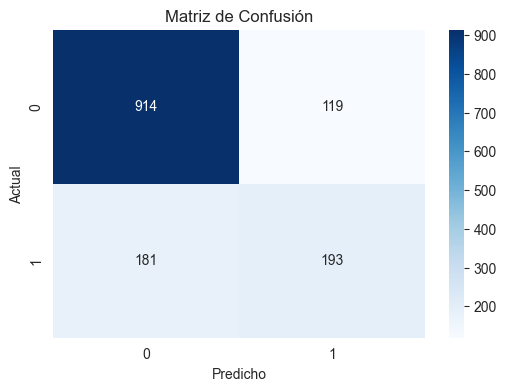

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Verificar el directorio de trabajo actual
print("Directorio de trabajo actual:", os.getcwd())
print("Contenido del directorio actual:", os.listdir())

# 2. Cargar el dataset
df = pd.read_csv('../../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 3. Ver las primeras filas
print("\nPrimeras filas del DataFrame:")
print(df.head())

# 4. Información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())

# 5. Convertir 'TotalCharges' a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 6. Verificar valores faltantes después de la conversión
print("\nValores faltantes por columna después de convertir 'TotalCharges':")
print(df.isnull().sum())

# 7. Eliminar filas con valores faltantes
df = df.dropna()
print(f"\nFilas después de eliminar NaN: {df.shape[0]}")
print(f"Columnas después de eliminar NaN: {df.shape[1]}")

# 8. Convertir 'Churn' a 0/1
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("\nConteo de 'Churn' después de la conversión:")
print(df['Churn'].value_counts())

# 9. Definir columnas categóricas y numéricas
cat_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# 10. Aplicar get_dummies a las columnas categóricas
df_cat = pd.get_dummies(df[cat_cols], drop_first=True)
print("\nPrimeras filas de las dummy variables:")
print(df_cat.head())

# 11. Concatenar columnas numéricas, dummy variables y 'Churn'
df_encoded = pd.concat([df[num_cols], df_cat, df['Churn']], axis=1)
print(f"\nDimensiones del DataFrame codificado: {df_encoded.shape}")
print("\nPrimeras filas del DataFrame codificado:")
print(df_encoded.head())

# 12. Verificar valores faltantes en df_encoded
print("\nValores faltantes en df_encoded:")
print(df_encoded.isnull().sum())

# 13. Separar en X e y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 14. Verificar dimensiones de X e y
print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# 15. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 16. Verificar dimensiones de los conjuntos
print(f"\nEntrenamiento X: {X_train.shape}, Entrenamiento y: {y_train.shape}")
print(f"Prueba X: {X_test.shape}, Prueba y: {y_test.shape}")

# 17. Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 18. Verificar que no haya NaN después de escalar
print("\nValores faltantes en X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Valores faltantes en X_test_scaled:", np.isnan(X_test_scaled).sum())

# 19. Crear y entrenar el modelo de Regresión Logística con solver 'saga'
model = LogisticRegression(max_iter=1000, solver='saga', penalty='l2')  # Puedes cambiar a 'l1' si lo prefieres
model.fit(X_train_scaled, y_train)
print("\nModelo entrenado correctamente.")

# 20. Hacer predicciones
y_pred = model.predict(X_test_scaled)

# 21. Evaluar el modelo
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 22. Mostrar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Actual")
plt.show()


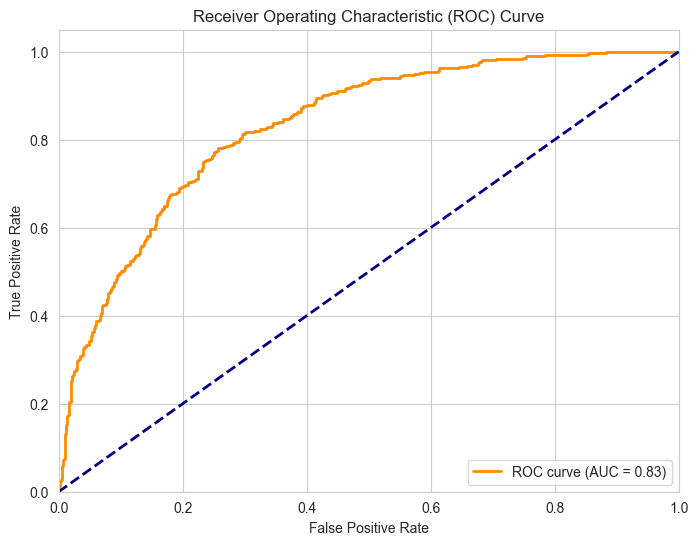

In [68]:
#curva rod & auc
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción
ay_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


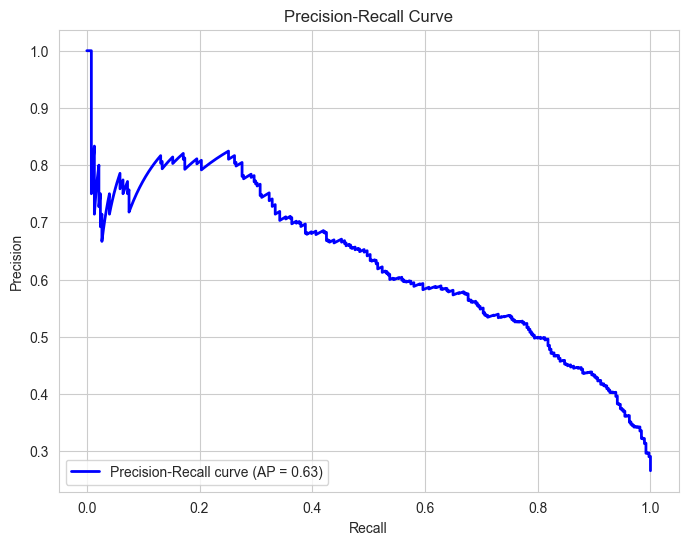

In [69]:
#Curva Precision-Recall
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular la curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plotear la curva Precision-Recall
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


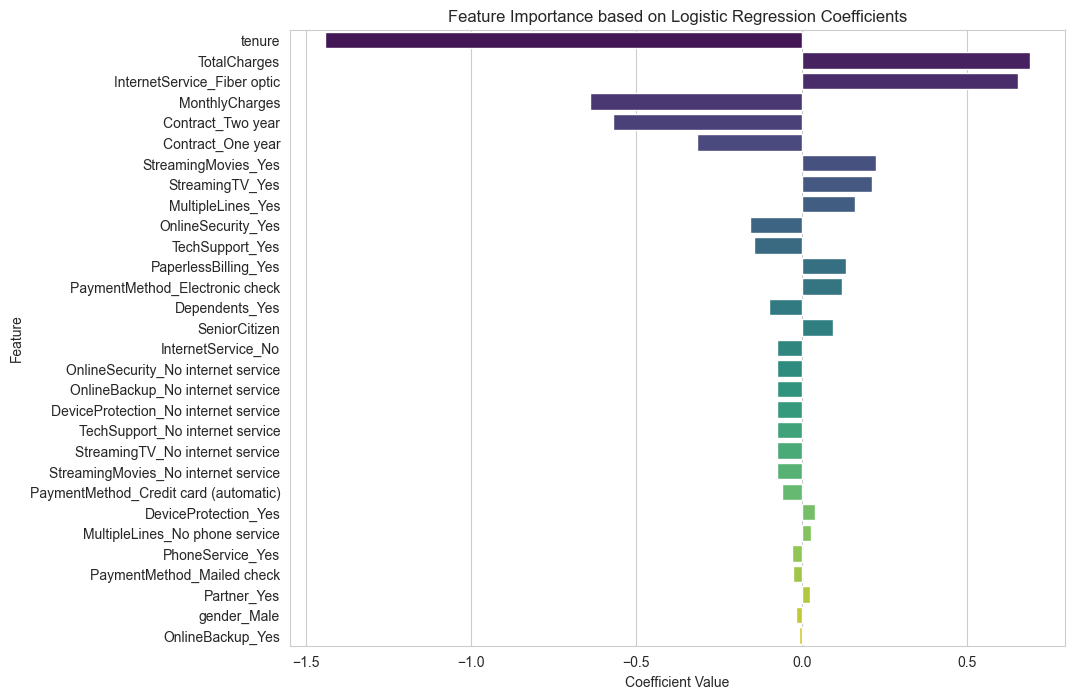

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]
feature_names = X.columns

# Crear un DataFrame con las características y sus coeficientes
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Ordenar por valor absoluto del coeficiente
feature_importance['abs_coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Plotear la importancia de las características con ajuste para evitar FutureWarning
plt.figure(figsize=(10,8))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=feature_importance,
    hue='Feature',
    palette='viridis',
    dodge=False
)
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend([],[], frameon=False)  # Eliminar la leyenda
plt.show()


/var/folders/bn/rwb_5qds2wjgvr56qqcxf70m0000gn/T/ipykernel_53184/878319366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


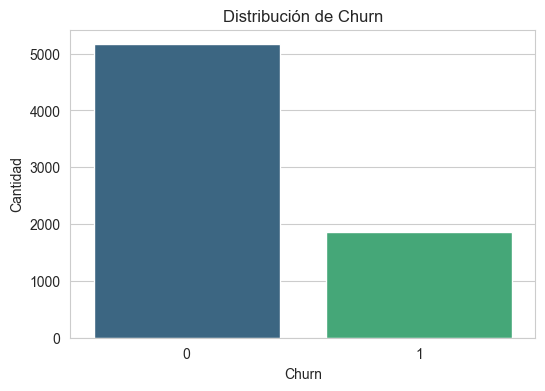

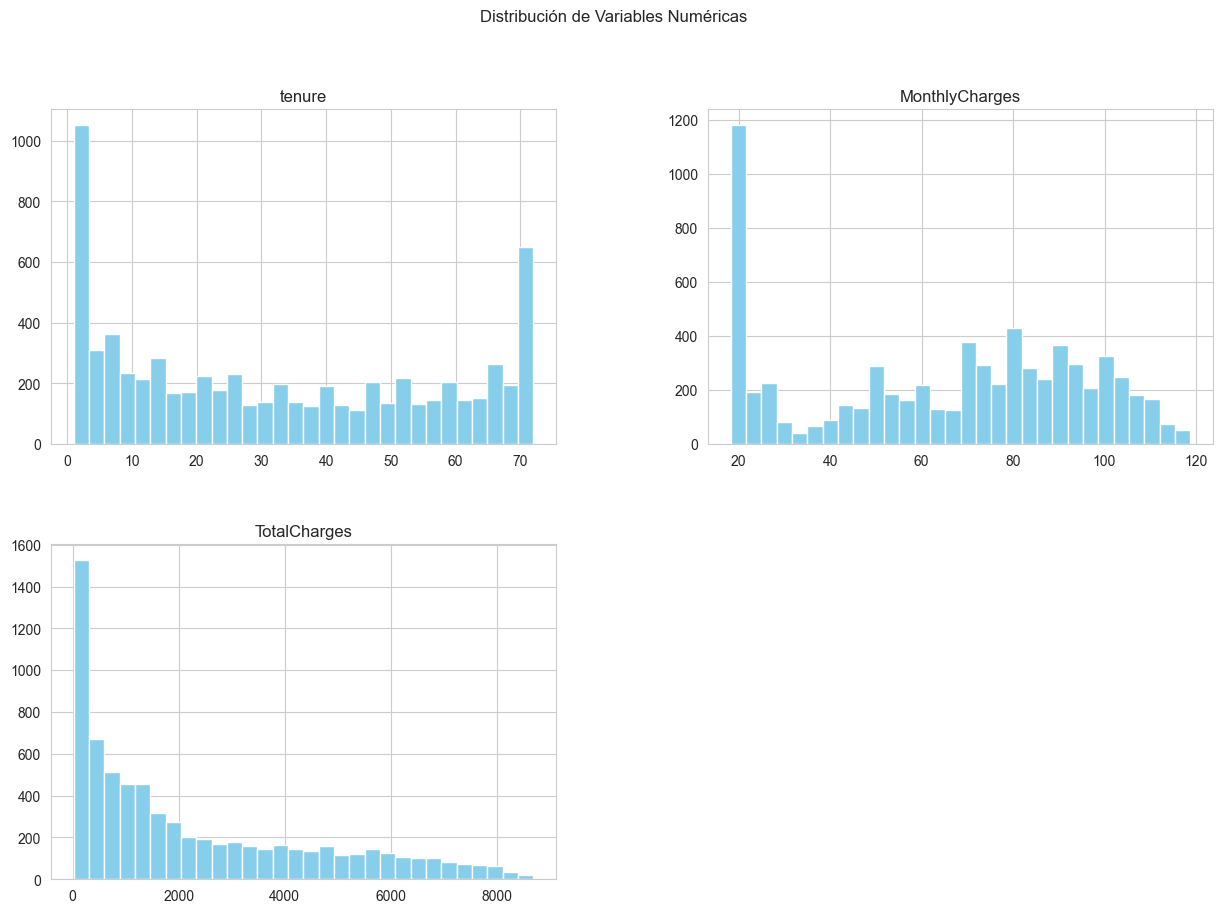

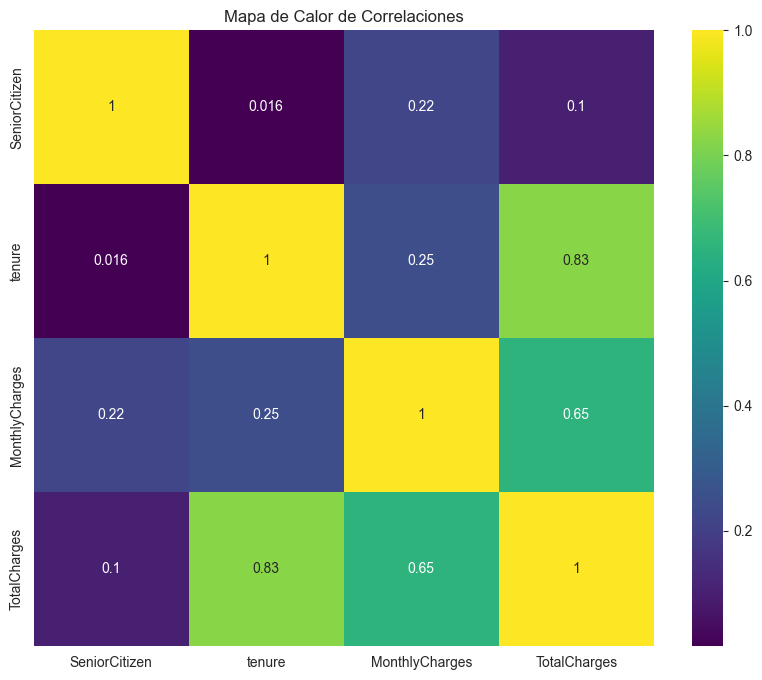

In [78]:
# Distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
plt.show()

# Distribución de algunas variables numéricas
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features].hist(bins=30, figsize=(15,10), color='skyblue')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()
 
# Correlación entre variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='viridis')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

